<a href="https://colab.research.google.com/github/Pranshu244/CGPA-Predictor/blob/main/Model-Training/cgpa_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn==1.8.0 joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
import joblib
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("student_lifestyle_performance_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Branch                 1000 non-null   object 
 2   Study_Hours_per_Day    1000 non-null   float64
 3   Sleep_Hours            1000 non-null   float64
 4   Screen_Time_Hours      1000 non-null   float64
 5   Gym_Hours_per_Week     1000 non-null   float64
 6   Diet_Type              1000 non-null   object 
 7   Attendance_Percentage  1000 non-null   float64
 8   Stress_Level_1_to_10   1000 non-null   float64
 9   Residence              1000 non-null   object 
 10  Internal_Marks         1000 non-null   float64
 11  CGPA                   1000 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 93.9+ KB


In [5]:
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("*"*26)

Branch
Civil         177
IT            176
CSE           165
ECE           161
Mechanical    161
Electrical    160
Name: count, dtype: int64
**************************
Diet_Type
Veg        593
Non-Veg    407
Name: count, dtype: int64
**************************
Residence
Hosteller      503
Day Scholar    497
Name: count, dtype: int64
**************************


In [6]:
df.shape

(1000, 12)

In [7]:
df.sample(5)

,Age,Branch,Study_Hours_per_Day,Sleep_Hours,Screen_Time_Hours,Gym_Hours_per_Week,Diet_Type,Attendance_Percentage,Stress_Level_1_to_10,Residence,Internal_Marks,CGPA
617,25,CSE,4.10,5.19,5.44,4.87,Non-Veg,71.86,4.13,Day Scholar,57.11,6.68
957,17,Civil,1.61,6.94,2.37,9.56,Veg,63.39,1.00,Hosteller,54.33,6.53
405,17,Electrical,6.87,7.92,2.21,18.13,Non-Veg,95.26,5.40,Hosteller,90.39,10.00
420,21,Electrical,2.74,6.28,5.97,7.64,Non-Veg,75.15,2.66,Hosteller,61.59,6.88
469,23,CSE,4.13,6.64,1.00,7.67,Veg,83.49,6.55,Hosteller,58.87,6.78


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
Age,0
Branch,0
Study_Hours_per_Day,0
Sleep_Hours,0
Screen_Time_Hours,0
Gym_Hours_per_Week,0
Diet_Type,0
Attendance_Percentage,0
Stress_Level_1_to_10,0
Residence,0


In [10]:
df.describe()

,Age,Study_Hours_per_Day,Sleep_Hours,Screen_Time_Hours,Gym_Hours_per_Week,Attendance_Percentage,Stress_Level_1_to_10,Internal_Marks,CGPA
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.898000,4.037970,6.525030,4.95191,7.311910,80.084340,4.582850,65.922380,7.319300
std,2.603916,1.434691,1.205664,1.97294,4.949333,8.578242,2.024595,10.123247,0.953812
min,17.000000,0.500000,3.000000,1.00000,0.000000,54.660000,1.000000,35.000000,4.000000
25%,19.000000,3.020000,5.710000,3.49000,3.445000,74.307500,3.095000,59.330000,6.690000
50%,21.000000,4.090000,6.515000,4.95500,6.975000,80.210000,4.540000,65.600000,7.300000
75%,23.000000,5.030000,7.380000,6.37250,10.780000,86.165000,5.962500,72.547500,7.990000
max,25.000000,8.050000,10.000000,10.84000,21.000000,100.000000,10.000000,93.930000,10.000000


In [11]:
df.describe(include="object")

,Branch,Diet_Type,Residence
count,1000,1000,1000
unique,6,2,2
top,Civil,Veg,Hosteller
freq,177,593,503


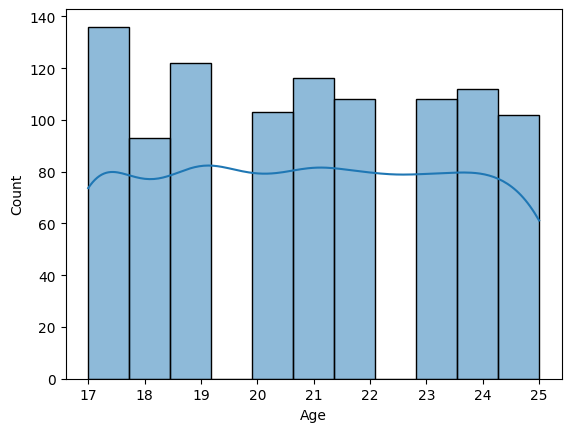

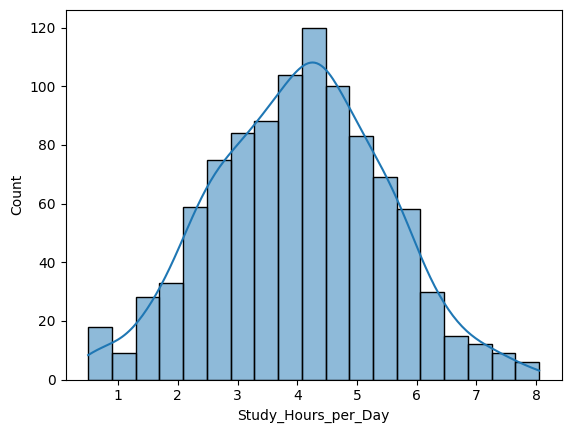

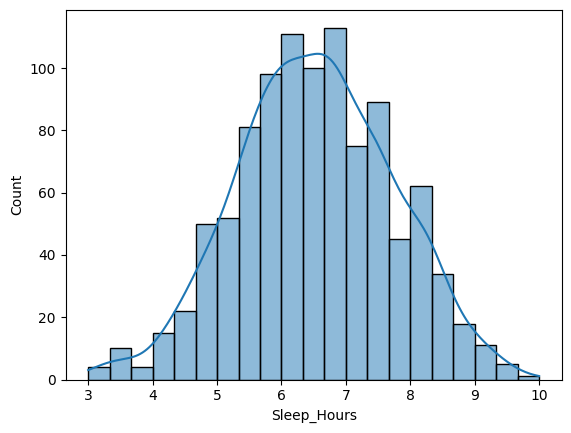

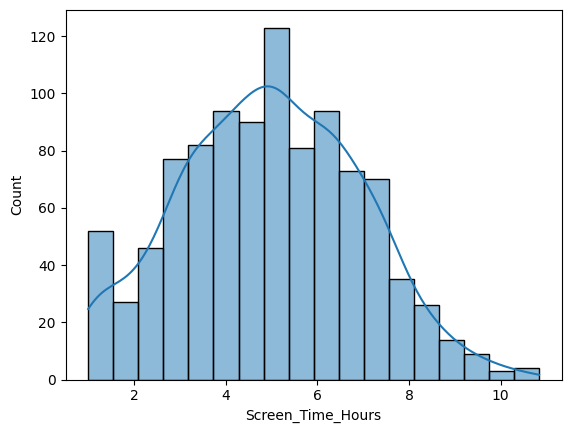

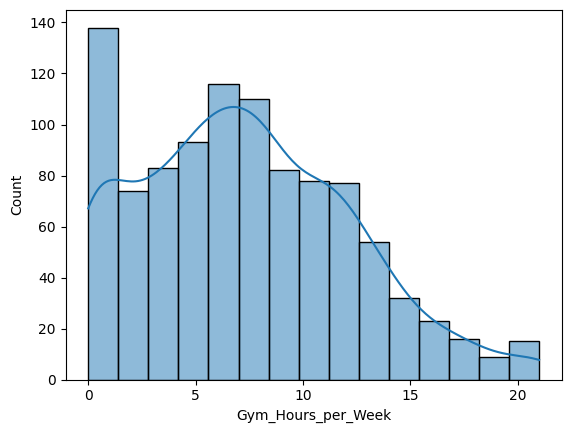

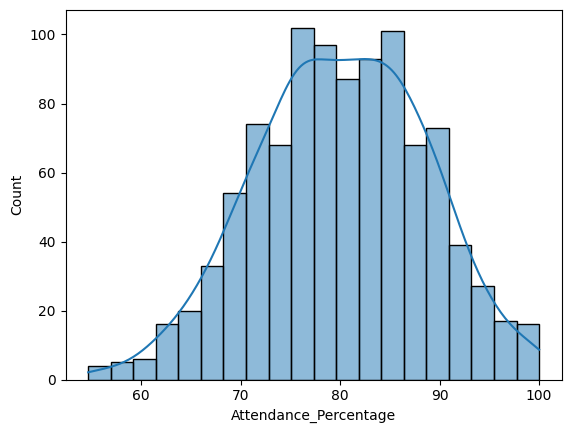

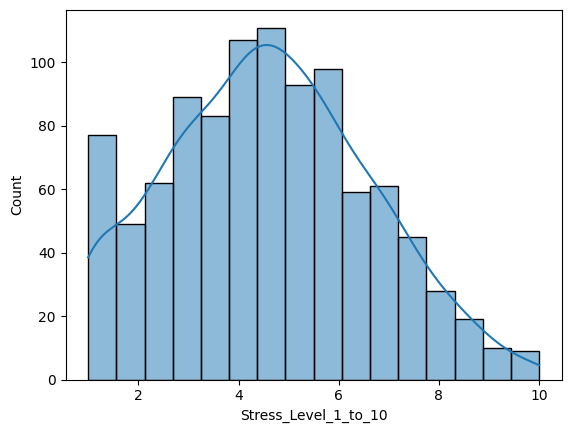

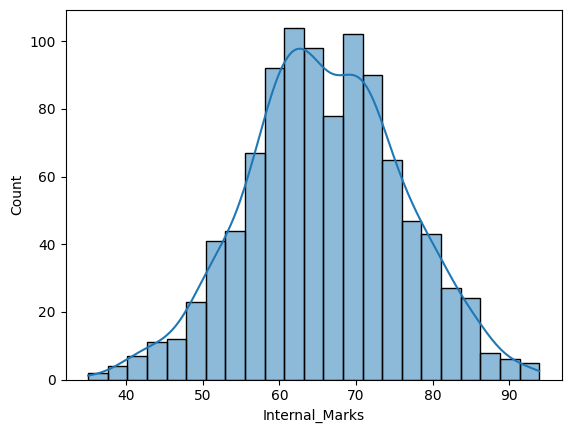

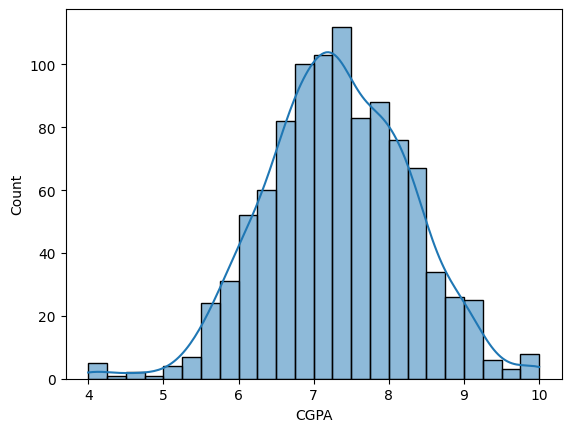

In [12]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

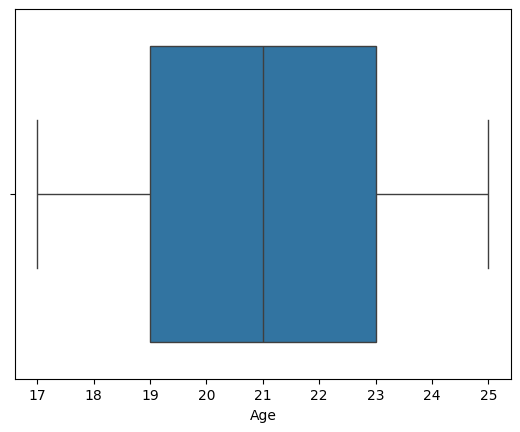

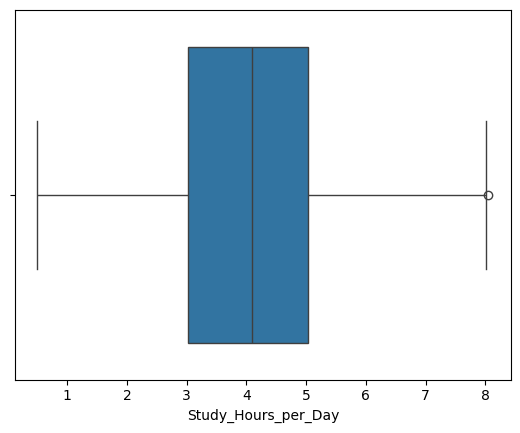

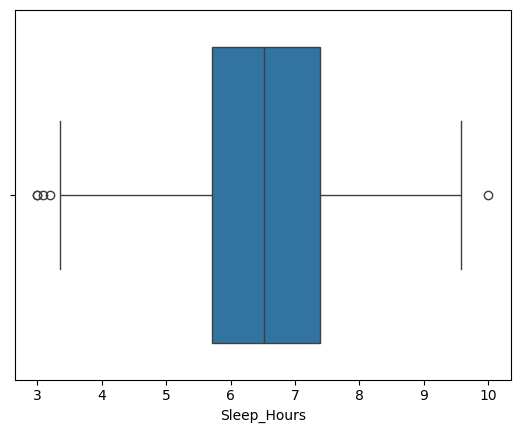

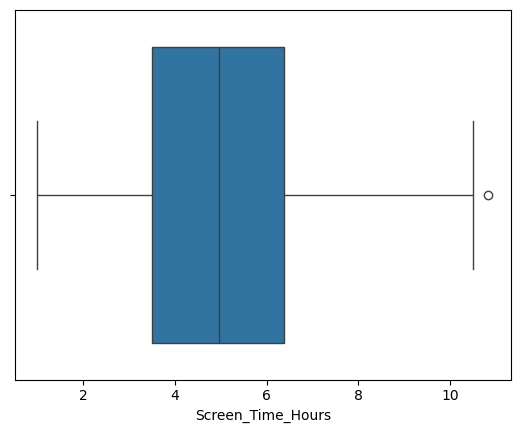

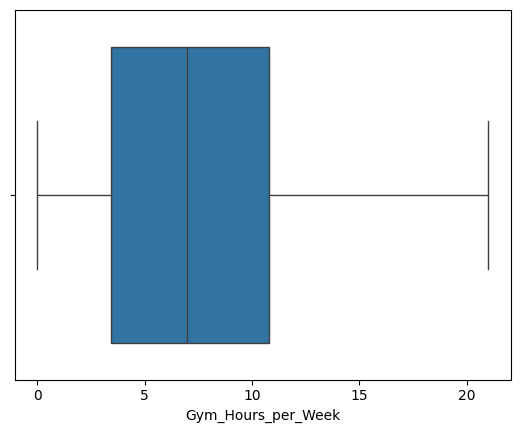

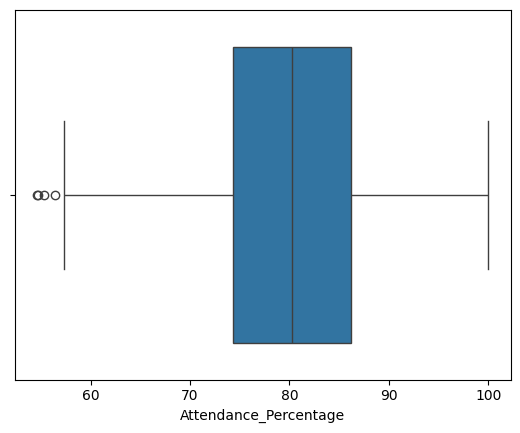

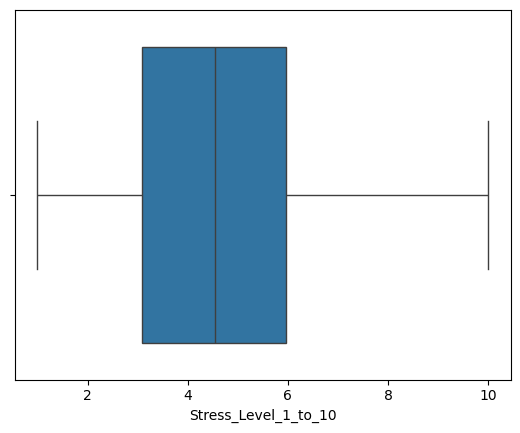

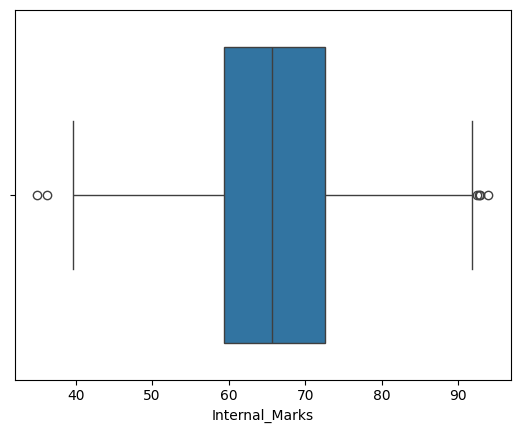

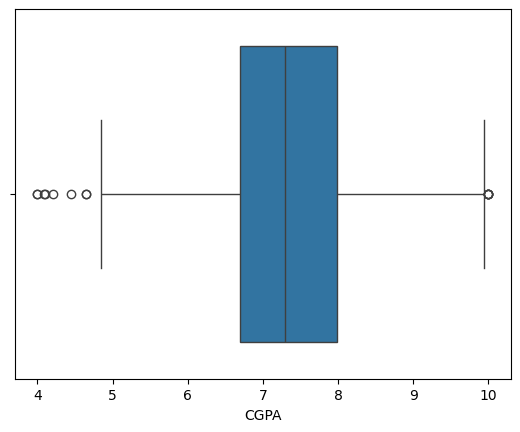

In [13]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [14]:
df.select_dtypes(include="number").columns

Index(['Age', 'Study_Hours_per_Day', 'Sleep_Hours', 'Screen_Time_Hours',
       'Gym_Hours_per_Week', 'Attendance_Percentage', 'Stress_Level_1_to_10',
       'Internal_Marks', 'CGPA'],
      dtype='object')

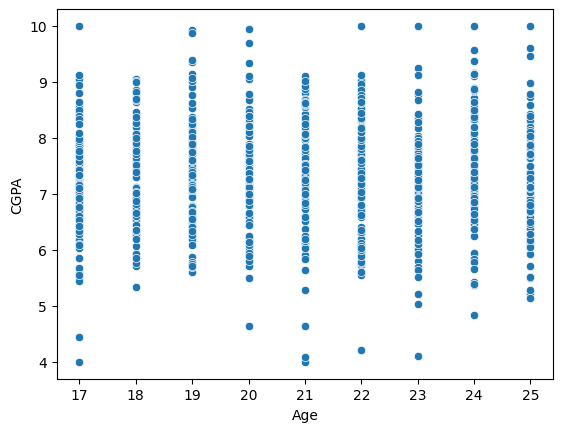

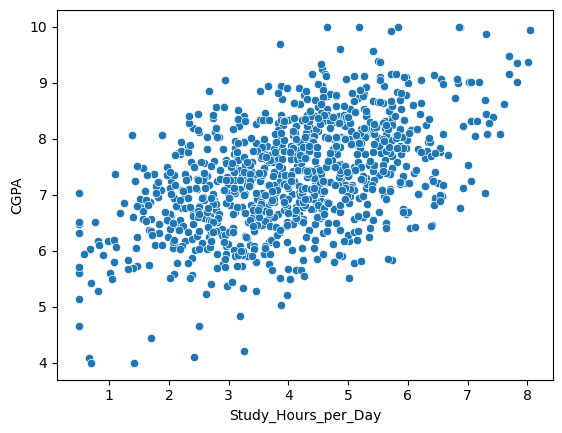

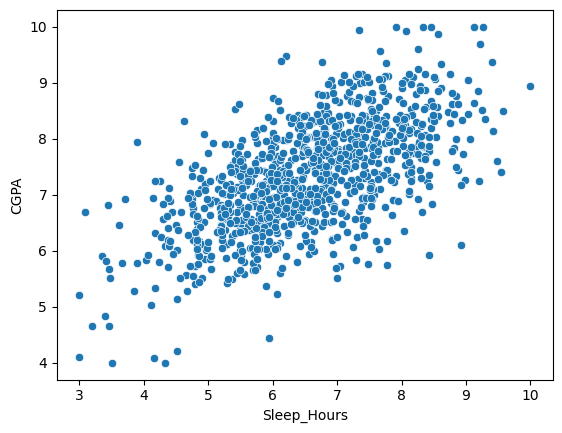

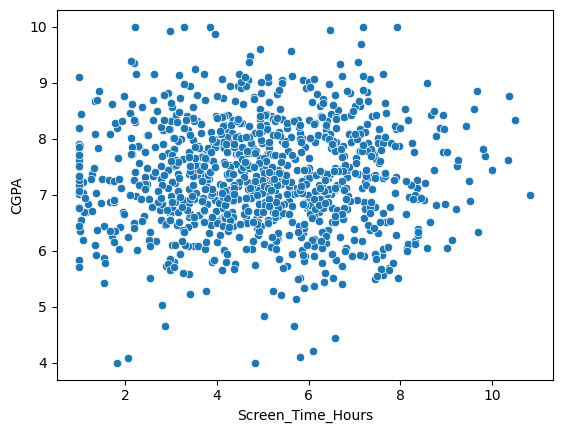

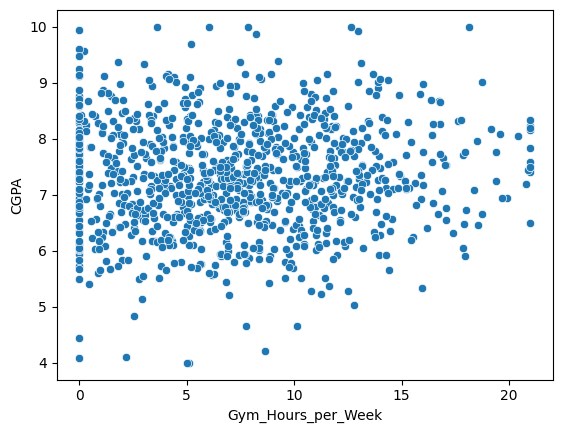

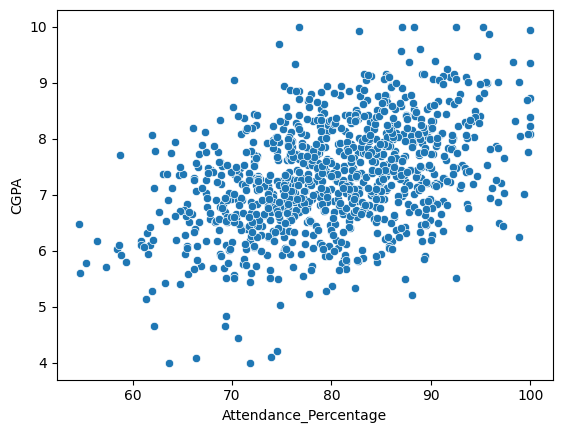

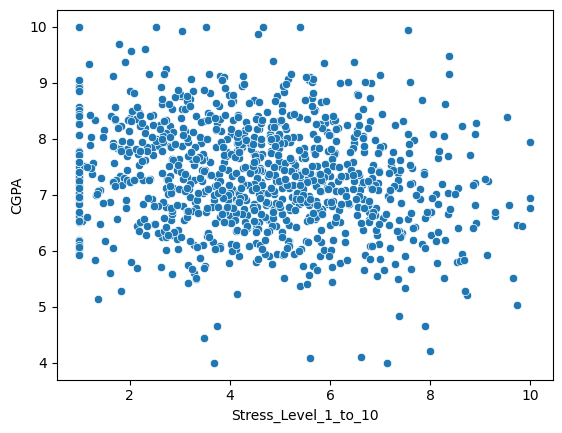

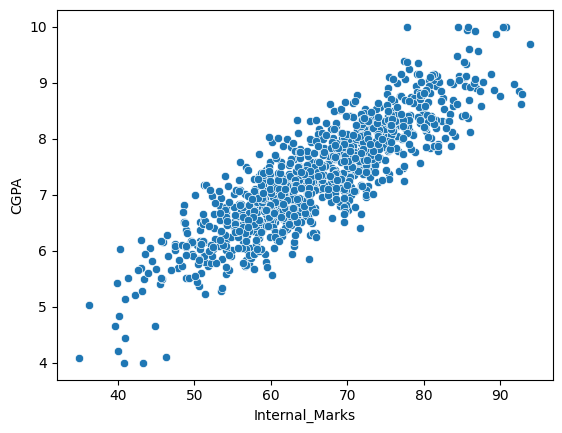

In [15]:
for i in ['Age', 'Study_Hours_per_Day', 'Sleep_Hours', 'Screen_Time_Hours',
       'Gym_Hours_per_Week', 'Attendance_Percentage', 'Stress_Level_1_to_10',
       'Internal_Marks']:
       sns.scatterplot(data=df,x=i,y='CGPA')
       plt.show()

<Axes: >

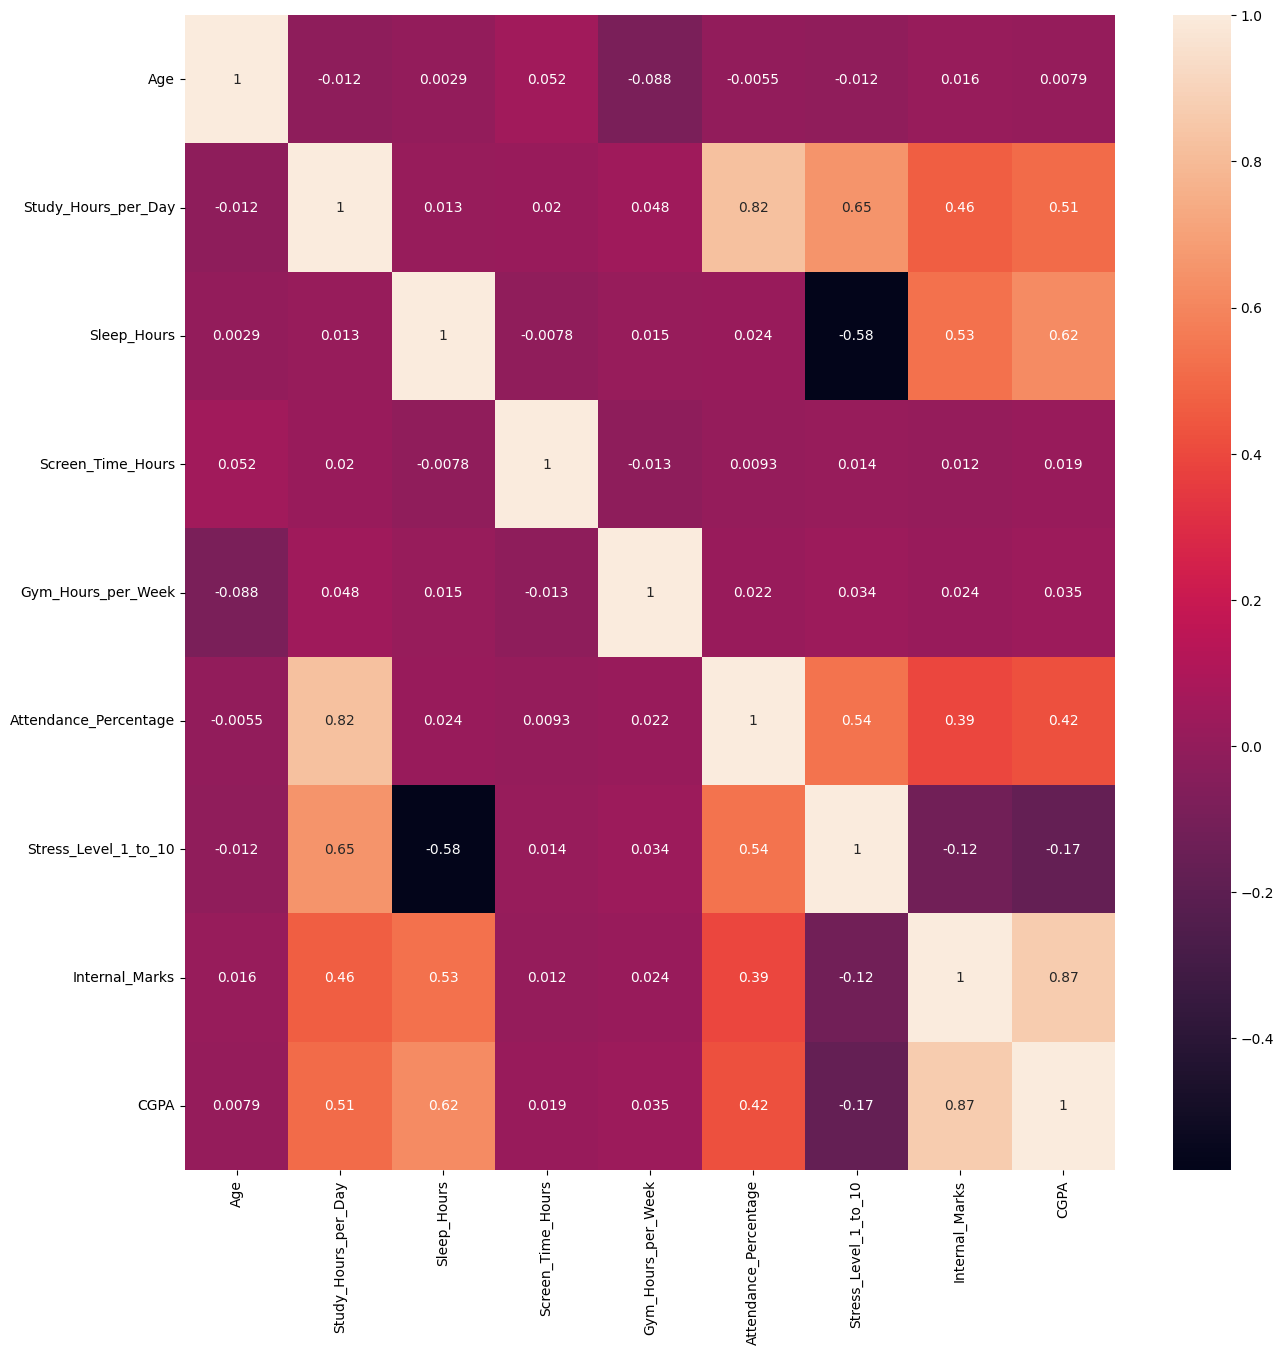

In [16]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [17]:
df.columns

Index(['Age', 'Branch', 'Study_Hours_per_Day', 'Sleep_Hours',
       'Screen_Time_Hours', 'Gym_Hours_per_Week', 'Diet_Type',
       'Attendance_Percentage', 'Stress_Level_1_to_10', 'Residence',
       'Internal_Marks', 'CGPA'],
      dtype='object')

In [18]:
x=df.drop(columns=["CGPA"])
y=df["CGPA"]

In [19]:
nums=['Age', 'Study_Hours_per_Day', 'Sleep_Hours', 'Screen_Time_Hours',
       'Gym_Hours_per_Week', 'Attendance_Percentage', 'Stress_Level_1_to_10',
       'Internal_Marks']

In [20]:
preprocessor=ColumnTransformer(
    transformers=[
        ("Branch_OHE",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["Branch"]),
        ("Binary_COLS_OHE",OneHotEncoder(drop="if_binary",sparse_output=False,handle_unknown="ignore"),["Diet_Type","Residence"]),
        ("Nums","passthrough",nums)
    ]
)

In [21]:
pipeline=Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("Regressor",RandomForestRegressor(n_estimators=200,
                                       max_depth=10,
                                       min_samples_split=5,
                                       min_samples_leaf=3,
                                       max_features="sqrt",
                                       random_state=42,
                                       n_jobs=-1))
    ])

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
pipeline.fit(x_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('Regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('Branch_OHE', ...), ('Binary_COLS_OHE', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of t

In [24]:
y_pred=pipeline.predict(x_test)

In [25]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"MSE={mse:.2f}")
print(f"RMSE={np.sqrt(mse):.2f}")
print(f"MAE={mae:.2f}")
print(f"R^2={r2:.2f}")

MSE=0.20
RMSE=0.45
MAE=0.35
R^2=0.81


In [26]:
y_train_pred=pipeline.predict(x_train)
mse_train=mean_squared_error(y_train,y_train_pred)
mae_train=mean_absolute_error(y_train,y_train_pred)
r2_train=r2_score(y_train,y_train_pred)
print(f"MSE_train={mse_train:.2f}")
print(f"RMSE_train={np.sqrt(mse_train):.2f}")
print(f"MAE_train={mae_train:.2f}")
print(f"R^2_train={r2_train:.2f}")

MSE_train=0.07
RMSE_train=0.27
MAE_train=0.21
R^2_train=0.91


In [27]:
scores = cross_val_score(pipeline, x, y, cv=5, scoring='r2')
print(f"Mean R2: {scores.mean():.2f} (+/- {scores.std():.2f})")

Mean R2: 0.80 (+/- 0.03)


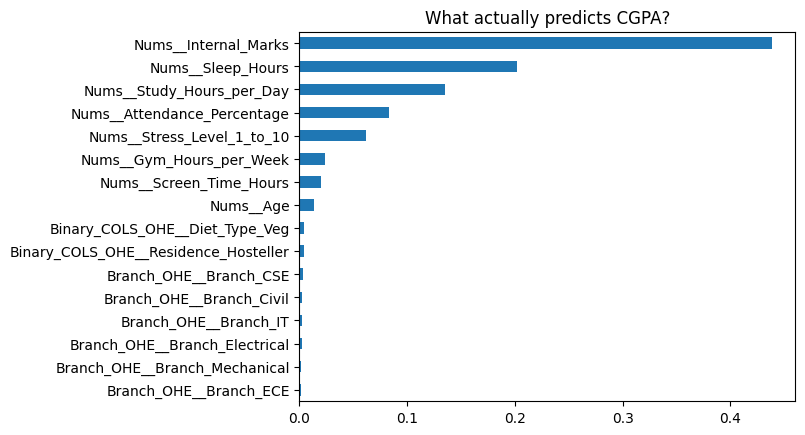

In [28]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = pipeline.named_steps['Regressor'].feature_importances_
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')
plt.title("What actually predicts CGPA?")
plt.show()


In [29]:
joblib.dump(pipeline, 'cgpa_predictor_v1.pkl')
print("Model saved!")

Model saved!
